<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [106]:
# Code:
def mean (args):
    holder = []
    for i in args:
        if np.isnan(i):
            args.remove(i)
        else:
            holder.append(i)
    return sum(holder)/len(holder)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [107]:
import numpy as np

# Code:
# find variance
def variance(args):
    mean_val = mean(args)
    numerator = 0
    for i in args:
        if np.isnan(i):
            args.remove(i)
        else:
            numerator += (i-mean_val)**2
    # population variance
    denominator = len(args) 
    return numerator/denominator

 # find standard deviation
def standard_deviation(args):
    return (variance(args))**.5


# test function
test_numbers = np.random.randn(100)

standard_deviation(test_numbers)

1.0554157215889253

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [108]:
# Code:
def str_to_float(args):
     try: 
          converted_num = float(args.replace('%','')) / 100
          return converted_num
     except:
          return None
str_to_float('30.5%')

0.305

# Part 2: Standardized Test Analysis

## Problem Statement

The Mayor of Half Moon Bay, California would like to identify an "initiative" that the town can take to improve education outcomes. Using the percentage of students who meet national standards for college readiness as an indicator of education success, we  aim to identify correlative relationships that could provide policy guidance for education spending, focusing on measures that would reallocate, rather than increase resources.  Acknowledging that the inputs may not have a causal effect on education outputs,  we believe identifying these statistical relationships can provide useful  guidance for setting education policy.


### Contents:
- [Summary](#Summary)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

# Executive Summary

We looked to identify correlative relationships between college readiness benchmark results and various education inputs to provide policy guidance for education spending in the town of Half Moon Bay (Cabrillo Unified School District).  First, we compared SAT and ACT benchmark performance to ensure there was no meaningful difference in the metrics.  We confirmed that both SAT and ACT benchmarks follow a similar distribution over the data set -- indicating that use of either metric as a proxy for student success would be reasonable. We then analyzed whether the SAT or ACT was more commonly taken in California, to identify which test would provide a more robust data set for analysis. The answer was overwhelmingly clear that the SAT is more frequently taken by California students.  Next, we analyzed the distribution of SAT benchmark performance across 393 school districts in California to identify the upper 30 school districts (ranked in terms of SAT benchmark performance) and compared them to Cabrillo Unified School District. Among the top 30 school districts, close to 90% of the students met readiness benchmarks in both math and reading; in Cabrillo Unified only 78% of students met SAT readiness-benchmarks in all subjects.  Our goal was to identify factors that correlated with that gap.

We performed comparative analyses on the upper-30 and Cabrillo Unified districts for the following factors: (1) school funding, (2) student-teacher ratio; (3) teacher education level; and (4) teacher experience -- split into years teaching overall and years teaching within a particular district.  We identified a correlative relationship between teacher education level and experience and student teacher ratios on higher benchmark outcomes, although the STR relationship was relatively weak.  Surprisingly, we identified a negative correlative relationship between outcomes and school funding; after researching, we found that since 2014, California education budgets have been linked to student need, as measured by numbers of students receiving various types of state support.

In light of this finding, we analyzed the exogenous factor of student socio-economic disadvantage on education outcomes. We believe this analysis has relevance in two ways. First, it demonstrates that while there is a correlative relationship between the above factors and student outcomes, the relationship is relatively weak (when compared to the socio-economic correlation, which is relatively strong).  Second, it may help focus the Mayor's policy agenda overall -- while the above-identified factors may help inform education spending, perhaps the Mayor's initiative should be focused not in the education area, per se, but in poverty-reduction, which may have knock-on positive effects to improving education outcomes.



# Datasets

**Original Datasets**
* [2018-19 CA ACT Data](../data/act_2019_ca.csv): 2019 ACT Scores in California by School

* [2018-19 CA SAT Data](../data/sat_2019_ca.csv): 2019 SAT Scores in California by School

* [2018-19 CA Student Enrollment Demographics](../data/cenroll_1819.csv): CA D.O.E. Student Demographic database: [Source](https://www.cde.ca.gov/ds/ad/filesenrcum.asp)

* [2018-19 CA District Fiscal Database](../data/current_expense_1819.xlsx): CA D.O.E District Expense Data: [Source](https://www.cde.ca.gov/ds/fd/ec/currentexpense.asp)
* [2018-19 CA Teacher Database](../data/staff_demo_18.csv): CA D.O.E. Teacher demographic database: [Source](https://www.cde.ca.gov/ds/ad/staffdemo.asp)

**Cleaned Datasets**

* [2018-19 CA Teacher data cleaned and merged by District](../data/staff_18_clean.csv): CA D.O.E. Teacher data merged and cleaned.

* [2018-19 CA Student data cleaned and merged by District](../data/cenroll_1819_clean.csv): CA D.O.E. Student data merged and cleaned.

* [2018-19 CA District Fiscal data cleaned and merged by District](../data/current_expense_1819_clean.xlsx): CA D.O.E District Expense data merged and cleaned.

* [Final Merged/Cleaned Dataset](..data/ca_edu_stats_1819.csv): Final Merged Dataset.

In [109]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import and Cleaning

In [110]:
import re
def clean_columns(df):
    df.columns = [col.lower().replace(' ', '_').replace('-','_') for col in df.columns]
    df.columns = [col.replace('\n', '_') for col in df.columns]
    return df

### California ACT Data

In [111]:
# CA ACT
act_2019_ca_df = pd.read_csv('../data/act_2019_ca.csv')

# drop columns
act_2019_ca_df.drop(columns = ['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'CName', 'Year', 'Unnamed: 17'], inplace=True)
act_2019_ca_df.replace({'*': np.nan}, inplace = True)
act_2019_ca_df = act_2019_ca_df.astype({col:'float' for col in act_2019_ca_df.columns if col not in ['DName']})

# snake case everything
act_2019_ca_df.columns = ['_'.join(re.findall('[A-Z][a-z]*',x)) for x in act_2019_ca_df.columns]

# Merge by school board
agg_functions = {col:'sum' if 'num' in col else 'mean' if 'pct' or 'avg' in col else None for col in act_2019_ca_df.columns if col not in ['D_Name']}
act_2019_ca_df = act_2019_ca_df.groupby(act_2019_ca_df['D_Name']).aggregate(agg_functions)

# clean columns
act_2019_ca_df.columns = [col.lower() for col in act_2019_ca_df.columns]
act_2019_ca_df.rename(columns={'num_g_e':'num_ge_21', 'pct_g_e':'pct_ge_21'}, inplace=True)

# convert percents
act_2019_ca_df['pct_ge_21']= act_2019_ca_df['pct_ge_21']/100

# add act prefix
act_2019_ca_df = act_2019_ca_df.add_prefix('act_')
act_2019_ca_df.index.names = ['d_name']

### California SAT Data

In [112]:
# sat_2019_ca
sat_2019_ca_df = pd.read_csv('../data/sat_2019_ca.csv')

# drop columns we're not interested - only want to look at 12th graders
sat_2019_ca_df.drop(sat_2019_ca_df.columns[[0,1,2,3,4,5,8,15,16,17,18,19,20,21]], axis=1, inplace=True)
sat_2019_ca_df.drop('Unnamed: 25', axis=1, inplace = True)

# snake case everything
sat_2019_ca_df.columns = ['_'.join(re.findall('[A-Z][a-z]*',x)) for x in sat_2019_ca_df.columns]

# clean columns
sat_2019_ca_df = clean_columns(sat_2019_ca_df)
sat_2019_ca_df.columns = [x.replace('_e_r_w_', '_erw_') for x in sat_2019_ca_df.columns]
sat_2019_ca_df.columns = [x.replace('_t_s_t_', '_tst_') for x in sat_2019_ca_df.columns]

# remove asterisks
sat_2019_ca_df.replace({'*': np.nan}, inplace = True)

# make everything floats that needs to be
sat_2019_ca_df = sat_2019_ca_df.astype({col:'float' for col in sat_2019_ca_df.columns if col not in ['d_name', 'c_name', 'year']})
sat_2019_ca_df['pct_both_benchmark'] = sat_2019_ca_df['pct_both_benchmark']/100
sat_2019_ca_df['pct_erw_benchmark']= sat_2019_ca_df['pct_erw_benchmark']/100
sat_2019_ca_df['pct_math_benchmark']= sat_2019_ca_df['pct_math_benchmark']/100

# aggregate by school district, using mean
agg_functions = {col:'sum' if 'num' in col else 'mean' if 'pct' in col else 'sum' for col in sat_2019_ca_df.columns if col not in ['d_name', 'c_name', 'year']}
sat_2019_ca_df = sat_2019_ca_df.groupby(sat_2019_ca_df['d_name']).aggregate(agg_functions)
sat_2019_ca_df = sat_2019_ca_df.add_prefix('sat_')

### School District Fiscal Data

[Source](https://www.cde.ca.gov/ds/fd/ec/currentexpense.asp)

In [113]:
ca_budgets_sd = pd.read_excel('../data/current_expense_1819.xlsx')

# clean columns
ca_budgets_sd.columns = ca_budgets_sd.loc[9]
ca_budgets_sd = ca_budgets_sd[10:].reset_index()
ca_budgets_sd = clean_columns(ca_budgets_sd)
ca_budgets_sd.drop(ca_budgets_sd.columns[[0,1,2]], axis=1, inplace=True)
ca_budgets_sd.rename(columns = {'district':'d_name'}, inplace=True)

# drop unused columns
ca_budgets_sd = ca_budgets_sd.astype({col:'float' for col in ca_budgets_sd.columns if col not in ['d_name', 'lea_type']})
ca_budgets_sd = ca_budgets_sd.query('lea_type != "Elementary"')

In [114]:
# write to csv
# ca_budgets_sd.to_csv('../data/current_expense_1819_clean.csv')

Merge SD budget and SD sat Dataframes

In [115]:
merged_ca_sat_rev = pd.merge(sat_2019_ca_df,ca_budgets_sd, left_on='d_name', right_on = 'd_name')

### Student Enrollment Data
[Source](https://www.cde.ca.gov/ds/ad/filesenrcum.asp)

In [116]:
# read in data
student_enrollment_db = pd.read_csv('../data/cenroll_1819.csv')

In [117]:
# read in enrollment data for students below poverty level
student_enrollment_db_pov = student_enrollment_db.query('ReportingCategory == "SS" and AggregateLevel == "S" and Charter == "All"').copy()
student_enrollment_db_pov.replace({'*': 0}, inplace = True)
student_enrollment_db_pov['CumulativeEnrollment_P'] = student_enrollment_db_pov['CumulativeEnrollment'].astype(float)
student_enrollment_db_pov = student_enrollment_db_pov[['DistrictName', 'CumulativeEnrollment_P']]

# aggregate districs
student_enrollment_db_pov = student_enrollment_db_pov.groupby(student_enrollment_db_pov['DistrictName']).aggregate('sum')
student_enrollment_db_pov.index.names = ['d_name']
student_enrollment_db_pov.rename(columns = {'CumulativeEnrollment_P':'cum_enrollment_sed'},inplace = True)

In [118]:

# Repeat but for all students and remove aggregating data so we don't get 107 billion students
student_enrollment_db = student_enrollment_db.query('ReportingCategory == "TA" and AggregateLevel == "S" and Charter == "All"')
# fix nan values
student_enrollment_db.replace({'*': 0}, inplace = True)
student_enrollment_db['CumulativeEnrollment'] = student_enrollment_db['CumulativeEnrollment'].astype(float)

# drop columns we won't use
student_enrollment_db.drop(['SchoolCode', 'AcademicYear', 'AggregateLevel', 
                            'CountyCode', 'DistrictCode', 'CountyName', 'SchoolName', 
                            'Charter', 'ReportingCategory'], axis=1, inplace=True)
# snake case columns
student_enrollment_db.columns = ['_'.join(re.findall('[A-Z][a-z]*',x)) for x in student_enrollment_db.columns]

# clean
student_enrollment_db = clean_columns(student_enrollment_db)
student_enrollment_db_agg = student_enrollment_db.groupby(student_enrollment_db['district_name']).aggregate('sum')
student_enrollment_db_agg.index.names = ['d_name']

In [119]:
student_enrollment_db_agg = student_enrollment_db_agg.merge(student_enrollment_db_pov, left_on='d_name', right_on = 'd_name')
student_enrollment_db_agg['socio_ec_disadv_pct'] = student_enrollment_db_agg['cum_enrollment_sed']/student_enrollment_db_agg['cumulative_enrollment']

In [120]:
# write to csv
# student_enrollment_db_agg.to_csv('../data/cenroll_1819_clean.csv', index=False)

### Teacher Demographic Data 
[Source](https://www.cde.ca.gov/ds/ad/staffdemo.asp)

In [121]:
# read in csv data
teacher_demo_db = pd.read_csv('../data/staff_demo_18.csv')

# snake case dolumns
teacher_demo_db.columns = ['_'.join(re.findall('[A-Z][a-z]*',x)) for x in teacher_demo_db.columns]

# clean columns
teacher_demo_db = clean_columns(teacher_demo_db)

# Quantify Education Level
edu_level_dict = {'D':10,'S':9,'V':8,'M':7,'U':6,'Y':5,'F':4,'C':3,'B':2,'A':1,'N':0}
teacher_demo_db.replace({"education_level":edu_level_dict}, inplace=True)

# Quantify Sex
sex_dict = {'M':0, 'F':1}
teacher_demo_db.replace({"gender_code":sex_dict}, inplace = True)

# Teachers per District
teachers_per_district = teacher_demo_db['district_name'].value_counts()

# drop columns we don't need
teacher_demo_db.drop(['academic_year', 'rec_i_d', 'district_code', 'county_name', 'ethnic_group', 
                      'employment_status_code', 'f_t_e_teaching', 'f_t_e', 
                      'f_t_e_pupil_services', 'file_created'], axis = 1, inplace=True)

# aggregate by mean statistics per school district
teacher_demo_db_agg = teacher_demo_db.groupby(teacher_demo_db['district_name']).aggregate('mean')

# San Marcos School district data is erroneous, remove San Marcos
teacher_demo_db_agg.drop('San Marcos Unified', inplace=True)

# change index name for merge
teacher_demo_db_agg.index.names = ['d_name']

# add num teachers per district
teacher_demo_db_agg['tchrs_per_district'] = teachers_per_district

In [122]:
# write to csv
# teacher_demo_db_agg.to_csv('../data/staff_demo_18_clean.csv')

In [123]:
# merge with students df
ca_districts_students_teachers = pd.merge(teacher_demo_db_agg, student_enrollment_db_agg, left_on='d_name', right_on='d_name')

# find student teacher ratio
ca_districts_students_teachers['student_teacher_ratio'] = ca_districts_students_teachers['cumulative_enrollment']/ca_districts_students_teachers['tchrs_per_district']

In [124]:
# merge everything
final_merged_df = pd.merge(merged_ca_sat_rev, ca_districts_students_teachers, left_on='d_name', right_on = 'd_name')

# rename columns
final_merged_df.columns = [x.replace('_benchmark', '_over_benchmark') for x in final_merged_df.columns]
final_merged_df.rename({'gender_code':'avg_tchr_sex', 'age':'avg_tchr_age','education_level':'avg_tchr_edu_lvl', 'years_teaching':'avg_tchr_yrs_tching', 'years_in_district':'avg_tchr_yrs_in_dstrct', 'edp_365':'annual_expense_of_ed'}, axis = 1, inplace = True)

In [125]:
final_merged_df = final_merged_df.merge(act_2019_ca_df, left_on='d_name', right_on='d_name')

### Final Merged Dataframe
CA Sat data dataframe, school budget dataframe, teacher demographic dataframe, student enrollment dataframe

In [126]:
final_merged_df.sort_values('sat_pct_both_over_benchmark', ascending = False)
# write to csv
# final_merged_df.to_csv('ca_edu_stats_1819.csv', index=False)

,d_name,sat_num_tst_takr,sat_num_erw_over_benchmark,sat_pct_erw_over_benchmark,sat_num_math_over_benchmark,sat_pct_math_over_benchmark,sat_enroll,sat_tot_num_both_over_benchmark,sat_pct_both_over_benchmark,annual_expense_of_ed,...,socio_ec_disadv_pct,student_teacher_ratio,act_enroll,act_num_tst_takr,act_avg_scr_read,act_avg_scr_eng,act_avg_scr_math,act_avg_scr_sci,act_num_ge_21,act_pct_ge_21
258,Piedmont City Unified,156.0,130.0,0.920300,120.0,0.850600,414.0,190.0,0.989600,4.245218e+07,...,0.022281,12.146789,152.333333,77.333333,30.000000,31.500000,29.000000,29.0,109.0,0.960650
164,La Canada Unified,340.0,326.0,0.958800,316.0,0.929400,679.0,348.0,0.977500,4.664342e+07,...,0.054932,18.364035,346.500000,138.000000,29.000000,29.000000,29.000000,28.0,130.0,0.942000
197,Manhattan Beach Unified,410.0,404.0,0.985400,358.0,0.873200,1376.0,566.0,0.969200,8.739182e+07,...,0.054030,18.307065,602.000000,269.000000,28.000000,28.000000,27.000000,27.0,245.0,0.910800
49,Carmel Unified,118.0,110.0,0.932200,92.0,0.779700,456.0,176.0,0.967000,5.626410e+07,...,0.186506,13.645503,211.000000,121.000000,26.000000,26.000000,25.000000,25.0,93.0,0.768600
248,Palo Alto Unified,734.0,706.0,0.961867,670.0,0.912867,2038.0,1232.0,0.966267,2.639671e+08,...,0.118780,12.766393,676.000000,302.666667,28.666667,28.666667,28.333333,28.0,262.0,0.866033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Southern Kern Unified,80.0,58.0,0.725000,28.0,0.350000,497.0,0.0,NaN,4.178305e+07,...,0.714914,18.935185,148.666667,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
351,Trona Joint Unified,18.0,0.0,NaN,0.0,NaN,543.0,0.0,NaN,7.416805e+06,...,0.741071,0.846348,215.666667,0.666667,NaN,NaN,NaN,NaN,NaN,NaN
353,Tulelake Basin Joint Unified,6.0,0.0,NaN,0.0,NaN,59.0,0.0,NaN,5.821483e+06,...,0.853012,14.821429,25.000000,15.000000,18.000000,15.000000,17.000000,18.0,1.0,0.066700
359,Upper Lake Unified,24.0,0.0,NaN,0.0,NaN,148.0,0.0,NaN,1.028738e+07,...,0.796537,17.433962,78.500000,18.000000,18.000000,16.000000,17.000000,17.0,4.0,0.222200


# Data Dictionary
---


| DataFrame            | Description                                                              |
| -------------------- | ------------------------------------------------------------------------ |
| sat_2019_ca          | SAT scores and metrics by school district for 2018-19.                   |
| act_2019_ca          | ACT scores and metrics by school district for 2018-19.                   |
| staff_demo_1819      | A large dataframe of every registered teacher in CA.                     |
| current_expense_1819 | Fiscal info for every school district in CA for the 2018-19 school year. |
| cenroll_1819         | Student enrollment and demographic data by school district for 2018-19.  |
| ca_edu_stats_1819    | Cleaned dataframe merged as appropriate from the above.                  |



---

| Feature                         | Type  | Dataset                   | Description                                                                                                                                                                                                                                                                                                                          |
| ------------------------------- | ----- | ------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| d_name                          | str   | All                       | The school district within California.                                                                                                                                                                                                                                                                                               |
| sat_enroll                      | float | CA 2019 SAT               | The number of 12th graders enrolled to take the SAT in 2018-2019.                                                                                                                                                                                                                                                                    |
| sat_num_tst_taker               | float | CA 2019 SAT               | The count of 12th graders that took the SAT in 2018-2019.                                                                                                                                                                                                                                                                            |
| sat_num_erw_over_benchmark      | float | CA 2019 SAT               | The count of 12th graders that exceeded the readiness benchmark in exploratory reading and writing(erw).                                                                                                                                                                                                                        |
| sat_pct_erw_over_benchmark      | float | CA 2019 SAT               | The percent of 12th graders that exceeded the readiness benchmark in exploratory reading and writing(erw).                                                                                                                                                                                                                      |
| sat_num_math_over_benchmark     | float | CA 2019 SAT               | The count of 12th graders that exceeded the readiness benchmark in math.                                                                                                                                                                                                                                                        |
| sat_pct_math_over_benchmark     | float | CA 2019 SAT               | The percent of 12th graders that exceeded the readiness benchmark in math.                                                                                                                                                                                                                                                      |
| sat_tot_num_both_over_benchmark | float | CA 2019 SAT               | The count of 12th graders that exceeded the readiness benchmark in math and erw.                                                                                                                                                                                                                                                |
| sat_pct_both_over_benchmark     | float | CA 2019 SAT               | The percent of 12th graders that exceeded the readiness benchmark in math and erw.                                                                                                                                                                                                                                              |
| annual_expense_of_ed            | float | CA School District Fiscal | Total general fund expenditures less food services, facilities acquisition and construction and certain other terms, divided by (ADA). <br/> The total days of student attendance divided by the number of instructional days in the year.                                                                                           |
| current_expense_per_ada         | float | CA School District Fiscal | annual_expense_of_ed divided by ADA -- the per-pupil cost of education per school board for 2018-2019.                                                                                                                                                                                                                               |
| lea_type                        | str   | CA School District Fiscal | Type of school district.                                                                                                                                                                                                                                                                                                             |
| avg_tchr_sex                    | float | CA Teacher Demographics   | Average sex of teachers within school district.                                                                                                                                                                                                                                                                                      |
| avg_tchr_edu_lvl                | float | CA Teacher Demographics   | Average level of education held by teachers within school district. <br/> 10 = Doctorate, 9 = Special, 8 = Master's + 30 or more semester hours, 7 = Master's, 6 = 5th year within bachelor's,<br /> 5 = 5th year induction, 4 = 5th year, 3 = Bachelors + 30 or more semester hours, 2 = Bachelors, 1 = Associate, 0 = Not reported |
| avg_tchr_yrs_tching             | float | CA Teacher Demographics   | Average number of years as a teacher.                                                                                                                                                                                                                                                                                                |
| avg_tchr_yrs_in_dstrct          | float | CA Teacher Demographics   | Average number of years teaching within that specific school district.                                                                                                                                                                                                                                                               |
| tchrs_per_district              | int   | CA Teacher Demographics   | Total number of teachers per school district.                                                                                                                                                                                                                                                                                        |
| cumulative_enrollment           | float | CA Student Enrollment     | Total number of students enrolled per school district.                                                                                                                                                                                                                                                                               |
| student_teacher_ratio           | float | CA Student/CA Teacher     | Average student to teacher ratio per school district.                                                                                                                                                                                                                                                                                |
| cum_enrollment_sed              | float | CA Student                | Total number of socioeconomically disadvantaged students/district.                                                                                                                                                                                                                                                                   |
| socio_ec_disadv_pct             | float | CA Student                | The percent of students that are socioeconomically disadvantaged/district.                                                                                                                                                                                                                                                           |
| act_enroll                      | float | CA 2019 ACT               | The number of 12th graders enrolled to take the ACT in 2018-19.                                                                                                                                                                                                                                                                      |
| act_num_tst_takr                | float | CA 2019 ACT               | The number of 12th graders that took the ACT in 2018-19.                                                                                                                                                                                                                                                                             |
| act_avg_scr_read                | float | CA 2019 ACT               | Average ACT reading score.                                                                                                                                                                                                                                                                                                           |
| act_avg_scr_eng                 | float | CA 2019 ACT               | Average ACT english score.                                                                                                                                                                                                                                                                                                           |
| act_avg_scr_math                | float | CA 2019 ACT               | Average ACT math score.                                                                                                                                                                                                                                                                                                              |
| act_avg_scr_sci                 | float | CA 2019 ACT               | Average ACT science score.                                                                                                                                                                                                                                                                                                           |
| act_num_ge_21                   | float | CA 2019 ACT               | The count of 12th graders scoring in excess of the ACT benchmark.                                                                                                                                                                                                                                                                    |
| act_pct_ge_21                   | float | CA 2019 ACT               | The percent of 12th graders that exceeded the ACT readiness benchmark.                                                                                                                                                                                                                                                                                                                                     |



### Standard Deviation Dictionary

In [127]:
# standard deviation code challenge

sd = {col:standard_deviation(final_merged_df[col].to_list()) if final_merged_df[col].dtypes !='object' else None for col in final_merged_df.columns}
sd

{'d_name': None,
 'sat_num_tst_takr': 2251.3991326600167,
 'sat_num_erw_over_benchmark': 1248.26533115584,
 'sat_pct_erw_over_benchmark': 0.15875518779926956,
 'sat_num_math_over_benchmark': 788.8837198645268,
 'sat_pct_math_over_benchmark': 0.20475538475278743,
 'sat_enroll': 4876.865288902886,
 'sat_tot_num_both_over_benchmark': 1066.1544502490103,
 'sat_pct_both_over_benchmark': 0.2285826074043896,
 'annual_expense_of_ed': 390148600.8441182,
 'current_expense_ada': 25321.528852231462,
 'current_expense_per_ada': 2999.7817621828963,
 'lea_type': None,
 'avg_tchr_sex': 0.0858512109164387,
 'avg_tchr_age': 2.1147815440624145,
 'avg_tchr_edu_lvl': 0.8808032733007137,
 'avg_tchr_yrs_tching': 2.285812283941066,
 'avg_tchr_yrs_in_dstrct': 2.54929700679066,
 'tchrs_per_district': 2066.170487943229,
 'cumulative_enrollment': 35768.20753448485,
 'cum_enrollment_sed': 28282.480170742572,
 'socio_ec_disadv_pct': 0.22587570117931247,
 'student_teacher_ratio': 3.242378895840655,
 'act_enroll': 26

# Exploratory Data Analysis
---

# [Part I] SAT vs. ACT Comparison over 393 California School Districts

This analysis was conducted on 393 school districts within the State of California during the 2018-2019 school year. The analysis is focused on SAT and ACT standardized test results amongst 12th graders, and accounts for 353,416 total tests taken.

Test takers in California are given the option to take either the SAT or the ACT or both. The SAT assesses the student's performance over two main sections: Exploratory Reading and Writing, and Mathematics. Both sections are scored on a 0 - 800 scale. The ACT is a four section test, comprised of Reading, English, Science and Mathematics, with each section scored on a 0-36 scale, and the final score being the rounded average of all four sections. For Part I, we have aggregated SAT and ACT test results by school district and performed summary statistics for each section of the tests and the tests as a whole.

In order to make reccomendations to the mayor of Half Moon Bay on how the town might move improve high school education results, we need to first understand if any significant differences exist between the SAT and ACT results. Thus, the purpose of Part I is to ask and answer the following questions:

1 - [Was there a difference in school district test enrollment and overall performance between the SAT and ACT for 2018-19?](##Was-there-a-difference-in-school-district-test-enrollment-and-overall-performance-between-the-SAT-and-ACT-for-the-2018-2019-test-year?)

2 - [Was there a difference in results for STEM and E.R.W. subjects across both tests?](##Was-there-a-difference-in-results-between-subjects?)

3 - [Where does Half Moon Bay fit into this distribution?](##Half-Moon-Bay-Statistics)

## Was there a difference in school district test enrollment and overall performance between the SAT and ACT for the 2018-2019 test year?

In [128]:
final_merged_df.head()

# total tests
print('2018-19 Total CA 12th graders ACT test takers: {:,.0f}'.format(final_merged_df['act_num_tst_takr'].sum()))
print('2018-19 Total CA 12th graders SAT test takers: {:,.0f}'.format(final_merged_df['sat_num_tst_takr'].sum()))

# IQR
print('2018-19 CA 12th grader benchmark SAT IQR: {:.2f}'.format(final_merged_df['sat_pct_both_over_benchmark'].quantile(.75)-
                                             final_merged_df['sat_pct_both_over_benchmark'].quantile(.25)))
print('2018-19 CA 12th grader benchmark ACT IQR: {:.2f}'.format(final_merged_df['act_pct_ge_21'].quantile(.75)-
                                             final_merged_df['act_pct_ge_21'].quantile(.25)))
# all descriptive statistics
final_merged_df[['d_name', 'sat_pct_both_over_benchmark', 'act_pct_ge_21','sat_num_tst_takr', 'act_num_tst_takr']].describe()

2018-19 Total CA 12th graders ACT test takers: 26,593
2018-19 Total CA 12th graders SAT test takers: 326,823
2018-19 CA 12th grader benchmark SAT IQR: 0.36
2018-19 CA 12th grader benchmark ACT IQR: 0.37


,sat_pct_both_over_benchmark,act_pct_ge_21,sat_num_tst_takr,act_num_tst_takr
count,350.000000,317.000000,393.000000,393.000000
mean,0.583108,0.563110,831.610687,67.665418
std,0.230618,0.228528,2254.268986,73.322390
min,0.009600,0.000000,0.000000,0.000000
25%,0.401744,0.377150,92.000000,16.000000
50%,0.613725,0.585200,326.000000,47.000000
75%,0.762967,0.748660,876.000000,93.000000
max,0.989600,0.961700,39968.000000,640.500000


### Discussion

**Number of Test Takers**

The CollegeBoard SAT was the more popular choice amongst the 393 California school districts selected for study. Of the 353,416 students studied, 326,823 (92%) took the SAT and 26,593 (8%) took the ACT.

**SAT vs. ACT Performance**

Of the 326,823 12th graders who took the SAT in 2018-2018, 58% scored above the Collegeboard benchmark in both subjects and of the 26,593 students that took the ACT 56% scored above the benchmark in all subjects. The amount of variance in test results was also similar between the two tests, with the SAT benchmark results exhibiting a standard deviation of 23% and the ACT results exhibiting a standard deviation of 23%, with nearly identical Inner Quartile Ranges.

The results suggest that either test can stand as a proxy for the assessed scholastic level of a school district and that the SAT is the overwhelming selection for standardized testing in California. Thus, this report will use SAT performance as the primary metric to sort school districts.

## What was the difference in results between subjects?

In [129]:
# num districts where ACT was taken
act_total = len(final_merged_df.query('act_num_tst_takr > 1'))

#english
eng = len(final_merged_df.query('act_avg_scr_eng >= 18'))/act_total
print('Percent of School districts meeting ACT English benchmark: {:.2}'.format(eng))

#reading
read = len(final_merged_df.query('act_avg_scr_read >= 22'))/act_total
print('Percent of School districts meeting ACT Reading benchmark: {:.2}'.format(read))

#math
math = len(final_merged_df.query('act_avg_scr_math >= 22'))/act_total
print('Percent of School districts meeting ACT Math benchmark: {:.2}'.format(math))

#science
sci = len(final_merged_df.query('act_avg_scr_sci >= 23'))/act_total
print('Percent of School districts meeting ACT Science benchmark: {:.2}'.format(sci))
print('')
print('SAT Math and E.R.W. Statistics')
final_merged_df[['d_name', 'sat_pct_math_over_benchmark', 'sat_pct_erw_over_benchmark']].describe()

Percent of School districts meeting ACT English benchmark: 0.75
Percent of School districts meeting ACT Reading benchmark: 0.52
Percent of School districts meeting ACT Math benchmark: 0.43
Percent of School districts meeting ACT Science benchmark: 0.33

SAT Math and E.R.W. Statistics


,sat_pct_math_over_benchmark,sat_pct_erw_over_benchmark
count,355.000000,355.000000
mean,0.499633,0.730242
std,0.205525,0.159857
min,0.000000,0.253700
25%,0.339925,0.622820
50%,0.495983,0.752517
75%,0.663733,0.862300
max,0.933300,1.000000


### Interactions between Math and E.R.W. Scores

In [235]:
def compare_subjects(subject):
    ratios = []
    for x in range(1,10):
        ratios.append(final_merged_df.query(f'sat_pct_{subject}_over_benchmark > {x/10}')['sat_pct_both_over_benchmark'].mean())

    subj_vs_total = pd.DataFrame()
    subj_vs_total[f'pct_of_students_meeting_{subject}_benchmark'] = [y/10 for y in range(1,10)]
    subj_vs_total['pct_of_students_meeting_all_benchmarks'] = ratios

    return subj_vs_total

print('Math Benchmark Interactions')
display(compare_subjects('math'))
print('E.R.W. Benchmark Interactions')
display(compare_subjects('erw'))

Math Benchmark Interactions


,pct_of_students_meeting_math_benchmark,pct_of_students_meeting_all_benchmarks
0,0.1,0.586798
1,0.2,0.610709
2,0.3,0.647944
3,0.4,0.704080
4,0.5,0.751278
5,0.6,0.812862
6,0.7,0.870329
7,0.8,0.921799
8,0.9,0.964457


E.R.W. Benchmark Interactions


,pct_of_students_meeting_erw_benchmark,pct_of_students_meeting_all_benchmarks
0,0.1,0.583176
1,0.2,0.583176
2,0.3,0.584561
3,0.4,0.597024
4,0.5,0.616209
5,0.6,0.655156
6,0.7,0.717808
7,0.8,0.785192
8,0.9,0.859894


### Discussion

**STEM subjects have lower scores**

Of the 326,823 SAT students studied, the mean percentage of students meeting the SAT Exploratory Reading and Writing benchmark was 73%. For SAT mathematics, the level was far lower, with 51% of all students meeting the readiness benchmark in Mathematics. (Note that because the Collegeboard benchmark scores reflect a 75% probability that the student will achieve a passing grade in a particular subject, the actual SAT score setting the benchmark differs between E.R.W. and Mathematics (480 vs 530).)

The ACT results are similar: 75% of the school districts met the readiness benchmark in English, 52% met the reading benchmark, 43% met the mathematics benchmark and 33% met the Science benchmark.

**STEM scores as a predictor for overall benchmark success**

The data suggests that STEM performance is a telling predictor for benchmark performance across the full spectrum of subjects. With respect to SAT performance, if a district has 30% of their students meet the math benchmark, they will have 65% of their students meet all benchmarks. If 50% of their students meet math the benchmark, 75% of the district will meet both benchmarks. These results seem to have higher "leverage" when compared to E.R.W. For example, of the 393 districts, if 70% of the district meets the E.R.W. benchmark, 71% of the district will meet all benchmarks, whereas if 70% of the students in the district meet the math benchmark, 87% of the district will meet both benchmarks.

# Half Moon Bay Statistics

In [130]:
half_moon_bay = final_merged_df.query('d_name == "Cabrillo Unified"')
half_moon_bay[['sat_num_tst_takr','sat_pct_erw_over_benchmark', 'sat_pct_math_over_benchmark', 'sat_pct_both_over_benchmark', 'act_num_tst_takr','act_pct_ge_21', 'cumulative_enrollment']].describe()

,sat_num_tst_takr,sat_pct_erw_over_benchmark,sat_pct_math_over_benchmark,sat_pct_both_over_benchmark,act_num_tst_takr,act_pct_ge_21,cumulative_enrollment
count,1.0,1.0000,1.0000,1.0000,1.0,1.0000,1.0
mean,154.0,0.7792,0.5714,0.7857,65.0,0.7692,3260.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,154.0,0.7792,0.5714,0.7857,65.0,0.7692,3260.0
25%,154.0,0.7792,0.5714,0.7857,65.0,0.7692,3260.0
50%,154.0,0.7792,0.5714,0.7857,65.0,0.7692,3260.0
75%,154.0,0.7792,0.5714,0.7857,65.0,0.7692,3260.0
max,154.0,0.7792,0.5714,0.7857,65.0,0.7692,3260.0


### Discussion

**Cabrillio Unified School District**

Half Moon Bay's school district is the [Cabrillo Unified School District](https://www.cabrillo.k12.ca.us/), with a cumulative enrollment of 3260 students.

Cabrillo Unified's results suggest that they are in the top half of the 393 school district population in all metrics. The Cabrillo Unified school districts mean percentage of students scoring above the SAT readiness benchmarks was 78% for E.R.W., 57% for Mathematics, and 78% for both subjects vs. 73% E.R.W./48% Math /58% Overall. Amongst the Cabrillo Unified ACT test takers, the mean percentage of students meeting all the readiness benchmark was 77% as opposed to the state mean of 56%. As with the larger population, the SAT was the more popular test, with 154 SAT test takers and 65 ACT test takers.

# [Part II] Sorting School Districts by Performance

In order to compare school districts and identify correlative relationships between college readiness and potentential policy determinations, we ranked the school districts by performance. The metric chosen for this analysis was the percent of student body, by district, meeting or exceeding college-readiness benchmarks for each subject. This is the one of the primary metrics used by the state to assess student achievement.

### Readiness-Benchmarks

The [Collegeboard Benchmarks](https://satsuite.collegeboard.org/k12-educators/about/understand-scores-benchmarks/benchmarks) and [ACT Benchmarks](https://www.act.org/content/dam/act/unsecured/documents/pdfs/R1670-college-readiness-benchmarks-2017-11.pdf) vary by grade level and score, but represent the same thing: a $75$% probability of the high school student earning at least a **C** in first-semester college courses. The current SAT benchmark levels are a **480** for Evidence Based Reading and Writing and a **530** for Mathematics, where both are on an 800 point scale. The current ACT benchmark levels are an **18** for English, a **22** for Mathematics, a **22** for reading and a **23** for science, all scores are on a **32** point scale. Rather than look at scores, in this analysis we will simply consider the percentage of the student body that has met or exceeded the benchmark score.

### The Upper Thirty School Districts

After sorting the 393 school districts by SAT benchmark performance on both E.R.W and Mathematics, the districts were sorted by the percent of the student body population within that district meeting all readiness benchmarks. We then chose to analyze the thirty school districts at the top of list for potentially correlative factors for higher-level SAT benchmark performance. Thus, the function of PART II is to ask and answer the following questions, and compare the answers to the Cabrillo Unified School District:

1 - [Which school districts out performed the SAT benchmarks by the highest margin in 2018-2019?](Which-school-districts-out-performed-the-SAT-benchmarks-by-the-highest-margin-in-2018-2019?)

2 - [What is the distribution in student-to-teacher ratio for the top 30 school districts?](What-is-the-distribution-in-student-to-teacher-ratio-for-the-top-30-school-districts?)

3 - [What is the distribution of teacher education, experience and age amongst the top 30 school districts?](What-is-the-distribution-of-teacher-education-and-experience-for-the-top-30-school-districts?)

4 - [What is the distribution in spending for the top 30 school districts?](What-is-the-distribution-in-spending-for-the-top-30-school-districts?)


## Which school districts out performed the SAT benchmarks by the highest margin in 2018-2019?


In [131]:
# top
top_thirty_sat = final_merged_df.sort_values('sat_pct_both_over_benchmark', ascending = False).head(30)
print('Upper Thirty SAT')
display(top_thirty_sat[['d_name']])
print('Summary Statistics for Upper 30 CA School districts')
display(top_thirty_sat[['d_name', 'sat_pct_both_over_benchmark', 'sat_pct_erw_over_benchmark', 'sat_pct_math_over_benchmark']].describe())

# bottom
print('Half Moon Bay')
display(half_moon_bay[['d_name', 'sat_pct_both_over_benchmark', 'sat_pct_erw_over_benchmark', 'sat_pct_math_over_benchmark']])


Upper Thirty SAT


,d_name
258,Piedmont City Unified
164,La Canada Unified
197,Manhattan Beach Unified
49,Carmel Unified
248,Palo Alto Unified
302,San Marino Unified
190,Los Gatos-Saratoga Joint Union High
4,Albany City Unified
152,Irvine Unified
332,South Pasadena Unified


Summary Statistics for Upper 30 CA School districts


,sat_pct_both_over_benchmark,sat_pct_erw_over_benchmark,sat_pct_math_over_benchmark
count,30.000000,30.000000,30.000000
mean,0.932526,0.931393,0.839608
std,0.027951,0.036479,0.054220
min,0.883375,0.840667,0.724533
25%,0.915337,0.919963,0.798175
50%,0.933075,0.943200,0.838757
75%,0.958229,0.957750,0.883312
max,0.989600,0.985400,0.933300


Half Moon Bay


,d_name,sat_pct_both_over_benchmark,sat_pct_erw_over_benchmark,sat_pct_math_over_benchmark
41,Cabrillo Unified,0.7857,0.7792,0.5714


### Discussion

The top 30 CA school districts sorted by the percentage of student body meeting the collegeboard SAT readiness benchmark yields the following statistics:

A mean percentage of student body meeting all benchmark scores was 93% with a standard deviation of 2.8%. The lack of variance in the data is further demonstrated by the differences between quartiles, with an inner-quartile range of 4.5%. Of the top 30, the percentage of students meeting the SAT math benchmark was 84% and the percentage of students meeting the E.R.W. benchmark was 93%. Thus, these upper 30 districts outperfrom the larger population of school districts by roughly 20% in E.R.W. and more than 30% in mathematics. Interestingly, the mathematics results amongst the upper 30 districts still trail E.R.W. suggesting that S.T.E.M subjects are more difficult to teach amongst CA public schools, and if the mathematics scores could be improved, the percentage of students meeting all benchmark subjects would improve.

**Comparison to Cabrillo Unified**

The Cabrillo unified school district lags the upper 30 school districts in benchmark performance by 15 percentage points in E.R.W and 42 percentage points in mathematics.

## What is the distribution in student-to-teacher ratio for the top 30 school districts?

In [132]:
print('Upper Thirty School Districts')
display(top_thirty_sat[['cumulative_enrollment', 'student_teacher_ratio']].describe())

print('Lower Ten School Districts')
display(final_merged_df[['cumulative_enrollment','student_teacher_ratio']].describe())

print('Half Moon Bay')
display(half_moon_bay[['d_name', 'student_teacher_ratio']])

Upper Thirty School Districts


,cumulative_enrollment,student_teacher_ratio
count,30.000000,30.000000
mean,11661.400000,17.959784
std,10909.307341,2.282181
min,2149.000000,12.146789
25%,3637.250000,16.775029
50%,8611.500000,18.453310
75%,14140.250000,19.509527
max,37898.000000,21.481078


Lower Ten School Districts


,cumulative_enrollment,student_teacher_ratio
count,393.000000,393.000000
mean,13251.129771,18.514440
std,35813.801189,3.246512
min,69.000000,0.773723
25%,2299.000000,17.341772
50%,5838.000000,18.958647
75%,15501.000000,20.337156
max,655653.000000,30.211268


Half Moon Bay


,d_name,student_teacher_ratio
41,Cabrillo Unified,18.843931


### Discussion
Teacher data is available from the California D.O.E. [2018-19 teacher demographic database](../data/staff_demo_18.csv) provided on the California D.O.E. website. The aggregated number of teachers per district was divided by the aggregated student enrollment data provided in the CA student demographic database to derive the student-to-teacher ratio. Our hypothesis was that student-teacher ratio was a causal factor in the over and under performance of CA districts.

**Student-Teacher ratio as a potential correlation to performance**

The prevailing theory underlying student-teacher ratio is that with a lower student-teacher ratio, students are afforded more individualized attention, resulting in better results. Our hypothesis was that the upper thirty school districts would have a lower student-teacher ratio than the mean student-teacher ratio for the 393 analyzed districts, as well as a lower student-to-teacher ratio than Cabrillo Unified School district.

We found that the rounded mean student-teacher ratio for the upper thirty districts was 18 with a standard deviation of 2. For the population of 393 districts, the mean student-teacher ratio was 19 with a standard deviation of 3. Within the Cabrillo Unified school district, the rounded student-teacher ratio was 19. The data slightly suggests that the upper thirty school districts enjoy the advantage of a lower student-to-teacher radio. Our firm believes that given the lower student-teacher-ratio amongst the upper 30 CA school districts, student-teacher-ratio might have a correlative effect with higher SAT benchmark performance.

## What is the distribution of teacher education, experience, and age for the top 30 school districts?


In [133]:
# upper thirty
print('Upper Thirty School Districts')
display(top_thirty_sat[['avg_tchr_age', 'avg_tchr_yrs_tching','avg_tchr_yrs_in_dstrct','avg_tchr_edu_lvl']].describe())

# all districts
print('All 393 Districts')
display(final_merged_df[['avg_tchr_age', 'avg_tchr_yrs_tching','avg_tchr_yrs_in_dstrct','avg_tchr_edu_lvl']].describe())

# Half Moon Bay
print('Half Moon Bay')
display(half_moon_bay[['avg_tchr_age','avg_tchr_yrs_tching','avg_tchr_yrs_in_dstrct','avg_tchr_edu_lvl']])

Upper Thirty School Districts


,avg_tchr_age,avg_tchr_yrs_tching,avg_tchr_yrs_in_dstrct,avg_tchr_edu_lvl
count,30.000000,30.000000,30.000000,30.000000
mean,44.718702,14.838611,11.061606,5.629644
std,1.757421,2.067731,1.448284,0.709658
min,40.714450,10.302868,7.958204,4.314136
25%,44.060697,13.504777,10.414416,5.170247
50%,44.853699,14.579269,10.975038,5.676952
75%,45.464223,16.280608,11.808750,6.092858
max,47.600917,18.875000,14.832474,6.894022


All 393 Districts


,avg_tchr_age,avg_tchr_yrs_tching,avg_tchr_yrs_in_dstrct,avg_tchr_edu_lvl
count,393.000000,393.000000,393.000000,393.000000
mean,44.491895,13.527126,10.720025,4.722933
std,2.117477,2.288726,2.552547,0.881926
min,39.258065,6.810811,1.712846,2.307692
25%,43.001435,12.093633,9.407465,4.093878
50%,44.635874,13.650943,10.883803,4.569106
75%,45.722222,15.103693,12.371455,5.349321
max,53.384615,20.400638,18.192338,7.401274


Half Moon Bay


,avg_tchr_age,avg_tchr_yrs_tching,avg_tchr_yrs_in_dstrct,avg_tchr_edu_lvl
41,45.953757,13.352601,10.346821,4.595376


### Discussion

Detailed teacher demographic data is available from the California D.O.E. Our hypothesis was that the top thirty performing school districts had a faculty that was both higher-educated and more experienced than the mean.

**Working with Teacher Demographic Data**

The [2018-19 teacher demographic database](../data/staff_demo_18.csv) provides various metrics such, as gender, age, level of education, years teaching and years teaching within the district. Our hypothesis was that age, level of education, and experience teaching could be potentially correlative factors to SAT benchmark performance.

In order to gain a more quantitative picture of faculty education, we converted the listed Education Level into numerical values. The listed education levels and there numeric equivalent as used in our analysis are:



| CA Edu. Symbol | Lvl of Edu.                                     | Numeric Equivalent |
| -------------- | ----------------------------------------------- | ------------------ |
| D              | Doctorate                                       | 10                 |
| S              | Special                                         | 9                  |
| V              | Master's Degree plus 30 or more semesters hours | 8                  |
| M              | Master's                                        | 7                  |
| U              | Fifth year within Baccalaureate                 | 6                  |
| Y              | Fifth year induction                            | 5                  |
| F              | Fifth year                                      | 4                  |
| C              | Baccalaureate plus 30 or more semester hours    | 3                  |
| B              | Baccalaureate                                   | 2                  |
| A              | Associate                                       | 1                  |
| N              | Not Reported                                    | 0                  |

With a quantitative understanding of level of education, it is possible to calculate summary statistics for the level of faculty education and explore correlations between teacher education and school district performance.

**Level of teacher education as a potential correlation to performance**

We found that amongst the top 30 school districts the mean rounded level of education was 6 (Fifth year within Baccalaureate) with a standard deviation of 1 (ranging up to a Master's degree or down to Fifth year induction), and amongst the general population of districts the mean round level was 5 with a standard deviation of 1 (or Fifth year induction ranging up to Fifth year within Baccalaureate and down to Fifth year). Within the Cabrillo Unified School district the mean level of teacher education is 5 (Fifth year induction).

This data suggests that teachers in the top 30 school districts are better educated and more highly credentialed than rest of the districts. Thus, the data supports a potential correlative link between the average level of teacher education and qualification and student body performance at the district level.

**Level of teacher experience as a potential correlation to performance**

Additionally, we found that the top 30 school districts had more experienced faculty, with the mean level of years teaching being 15 years with a standard deviation of 2  vs. 14 years with a standard deviation of 2 years amongst the 393 school districts. The average level of teaching experience within the Cabrillo Unified district is 13, lagging the upper 30 districts by 2 years and the larger population by 1 year of experience.

**Level of teacher experience within the school district as a potential correlation to performance**

The mean level of teaching experience within the particular district for the upper 30 district is 11 years with a standard deviation of 1 year, whereas within the 393 districts it is 11 years with a standard deviation of 3 years and 10 years within Cabrillo Unified. This indicates that there is slightly less faculty turnover within the upper districts than within the general population, and that the average teacher amongst the upper 30 districts has more experience with the students in that district than the teachers within Cabrillo unified.

**Distribution of Teacher Age amongst School districts**

The distribution in teacher age amongst the upper 30 school districts was the same as the 393 school districts, a mean faculty age of 45 with a standard deviation of 2, vs. a mean age of 46 within the Cabrillo unified school district.

## What is the distribution in per-pupil spending for the top 30 school districts?



In [134]:
# top 30
print('Top Thirty School Districts')
display(top_thirty_sat[['annual_expense_of_ed', 'current_expense_per_ada']].describe())

# 393 districts
print('All 393 Districts')
display(final_merged_df[['annual_expense_of_ed','current_expense_per_ada']].describe())

# Half Moon Bay
print('Half Moon Bay')
display(half_moon_bay[['annual_expense_of_ed', 'current_expense_per_ada']])

Top Thirty School Districts


,annual_expense_of_ed,current_expense_per_ada
count,3.000000e+01,30.000000
mean,1.312535e+08,13644.142901
std,1.106768e+08,3717.348917
min,3.379640e+07,10347.155154
25%,4.746239e+07,11089.587441
50%,9.534066e+07,11658.369274
75%,1.606863e+08,15413.070021
max,3.967974e+08,23849.613547


All 393 Districts


,annual_expense_of_ed,current_expense_per_ada
count,3.930000e+02,393.000000
mean,1.393205e+08,13685.176508
std,3.906459e+08,3003.605577
min,1.797933e+06,9560.139141
25%,2.292599e+07,11896.706391
50%,5.821769e+07,13004.458384
75%,1.602952e+08,14094.681144
max,7.213548e+09,32797.029551


Half Moon Bay


,annual_expense_of_ed,current_expense_per_ada
41,38226512.39,12687.235069


### Discussion

Our hypothesis was that school district benchmark performance was tied to district level of funding, as without an equitable distribution of funding between districts there could be a gap in access and resources. California has several statistics with which to measure district level fiscal data. We examined two major district level fiscal statistics: current expense per average daily attendance and annual expense of education.

**Fiscal Metrics and Grants**

The [Califonia DOE](https://www.cde.ca.gov/ds/fd/ec/currentexpense.asp) defines an average daily attendance (ADA) as "the total days of student attendance divided by the total days of instruction." The annual expense of education is the annualized total cost within the school district, divided by ADA resulting in the per-pupil cost of education at the district level.

We found that the mean expense/ADA for the upper 30 districts was 13,644 dollars, the mean expense/ADA for the 393 district population was 13,685 dollars, and the mean expense/ADA for Cabrillo Unified was 12,687 dollars. The relative homogeneity of this fiscal data was surprising to our firm until we researched the fiscal history of California school districts. California recently overhauled its complex and likely inequitable 40-year-old school grant allocation formula with the new [Local Control Funding Formula](https://www.cde.ca.gov/fg/aa/lc/lcffoverview.asp). The new funding formula (LCFF) provides for uniform distribution of district funding adjusted by grade span, adjusted by ADA and with special grants to provide for equity and access.



# Data Visualization

# District level comparison of SAT and ACT performance

The dataset consisted of $393$ California school districts spanning the entire state, within those districts, only the 12th grade class was used. Of the 393 selected school districts, there were 326,823 SAT test takers and 26,592 ACT test takers, making the SAT overwhelmingly more popular amongst CA school districts.

The metric chosen to distinguish upper and lower performing school districts was the percentage of student body, per school district, that outperformed the CollegeBoard SAT and ACT College Readiness benchmarks. The collegeboard and ACT benchmarks vary by grade level and score, but represent the same thing: a 75% probability of the student earning at least a C in first-semester college courses. (see: [CollegeBoard guide to SAT Benchmarks](https://satsuite.collegeboard.org/media/pdf/educator-benchmark-brief.pdf)). https://www.act.org/content/dam/act/unsecured/documents/benchmarks.pdf

### Number of SAT vs. ACT Test Takers



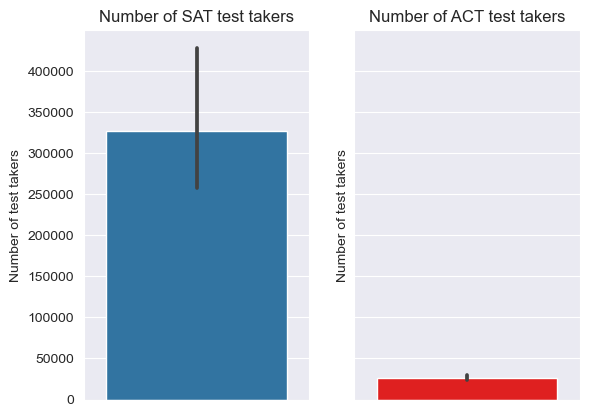

In [135]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.barplot(final_merged_df, y = 'sat_num_tst_takr', estimator = 'sum', ax = axs[0])
sns.barplot(final_merged_df, y = 'act_num_tst_takr', estimator = 'sum', ax = axs[1], color='r')
axs[0].set(title = 'Number of SAT test takers', ylabel = 'Number of test takers')
axs[1].set(title = 'Number of ACT test takers', ylabel = 'Number of test takers');

The SAT remains a far more popular test amongst CA School districts. Of the 353,416 students studied, 326,823 took the SAT and 26,593 took the ACT. The stark difference is illustrated in the graph rendered above.

### Histogram of SAT/ACT performance across 393 CA School Districts


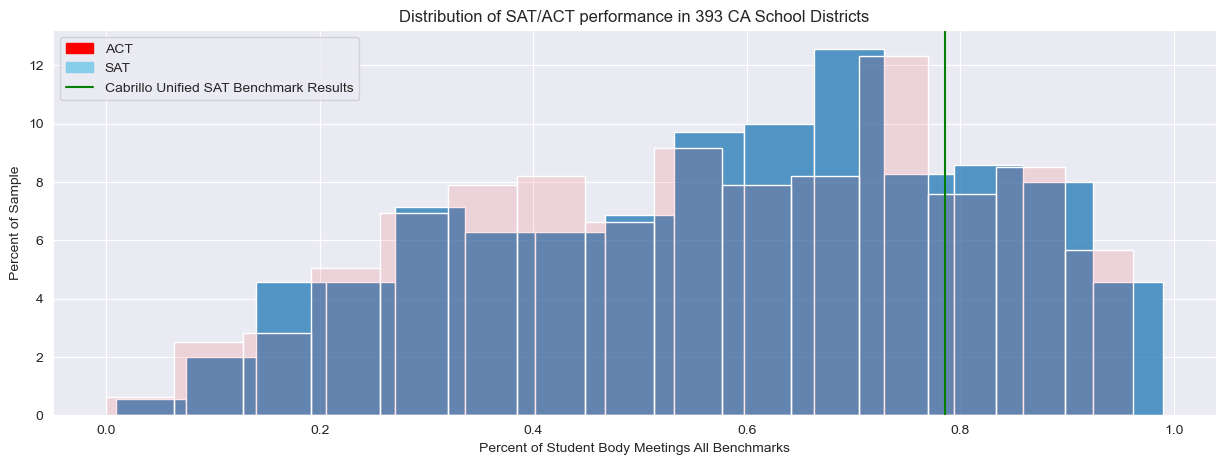

In [136]:
fig, axs = plt.subplots(figsize=(15,5))
sns.histplot(final_merged_df, x = 'sat_pct_both_over_benchmark', stat = 'percent', bins =15, label='SAT')
sns.histplot(final_merged_df, x = 'act_pct_ge_21', stat = 'percent', bins = 15, alpha = 0.1, color='r', label='ACT')
axs.set(title = 'Distribution of SAT/ACT performance in 393 CA School Districts')
axs.set(xlabel='Percent of Student Body Meetings All Benchmarks', ylabel = 'Percent of Sample');

cab = plt.axvline(half_moon_bay.sat_pct_both_over_benchmark.mean(), color = 'g', label='Cabrillo Unified SAT Benchmark Results')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color = 'red', label='ACT')
blue_patch = mpatches.Patch(color='skyblue', label='SAT')
axs.legend(handles=[red_patch, blue_patch, cab], loc = 'upper left')


The metric chosen for the above plot is the percent of student body that met the readiness benchmark on the respective test across *all* subjects.

**Different Tests, Similar Results**

The SAT and ACT show very a similar distribution of scores across all sampled CA school districts. In the plot below, the SAT is plotted in blue and the ACT is plotted in red, with the mean percent of students meeting the readiness benchmark across the population of school districts plotted as a vertical line. The kernel density plot included for both in order to provide a quick visual assessment of the shape of the distribution. The visual plot shows the results of the summary statistics in a visually cohesive way, of the 326,823 12th graders who took the SAT in 2018-2018, 58% scored above the Collegeboard benchmark and of the 26,593 students that took the ACT 56% scored above the benchmark.

The amount of variance in test results was also quite similar between the two tests, with the SAT benchmark results exhibiting a standard deviation of 23% and the ACT results exhibiting a standard deviation of 23%, with nearly identical Inner Quartile Ranges. For this reason, the two histograms nearly line up on each other.

**Analysis**

Both distributions are not normally distributed, which is as expected, we would hope that a majority of the student body across CA school districts would meet the readiness benchmarks. The distribution of student body readiness has a left tail and a peak showing that roughly 12 % of the school districts in the sample had 70% of their student body surpassing the readiness benchmarks. Additionally, it is unlikely, in the mind of the firm that one standardized test would be markedly different from another, as all school districts would likely switch to the test that yields the most impressive results.

**Conclusion**

ACT/SAT results for the 2018-2019 school year in California are similar and either test can serve as a proxy for college-readiness.

### Boxplot visualization of distribution of SAT and ACT scores amongst 393 CA School Districts


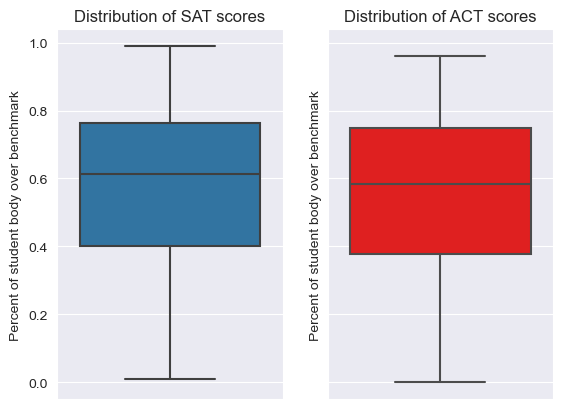

In [137]:
fig, axs = plt.subplots(1,2, sharey = True)
sns.boxplot(y = final_merged_df['sat_pct_both_over_benchmark'], ax = axs[0])
axs[0].set(title='Distribution of SAT scores', ylabel = 'Percent of student body over benchmark')
sns.boxplot(y = final_merged_df['act_pct_ge_21'], ax=axs[1], color='r')
axs[1].set(title='Distribution of ACT scores', ylabel = 'Percent of student body over benchmark');


The box and whiskers plot featured above again demonstrates the similarity in distribution of SAT and ACT scores amongst the 393 school district sample. The plots show a simlar mean, level of variance, and inner quartile range. This visualization reinforces what the numerical summary statistics and histograms presented above have outlined, the ACT/SAT yield similar levels of student performance.

### Exploring Differences in Results Across Subjects for the SAT


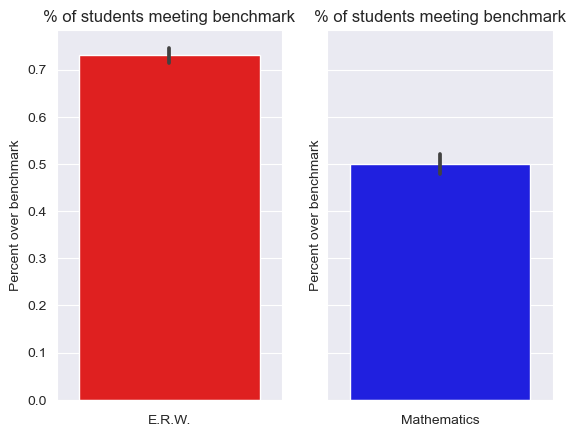

In [138]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.barplot(final_merged_df, y= 'sat_pct_math_over_benchmark', color = 'b' , ax = axs[1])
axs[1].set(title = '% of students meeting benchmark', ylabel = 'Percent over benchmark', xlabel = 'Mathematics')
sns.barplot(final_merged_df, y= 'sat_pct_erw_over_benchmark', color = 'r' , ax = axs[0]);
axs[0].set_title('E.R.W.')
axs[0].set(title = '% of students meeting benchmark', ylabel = 'Percent over benchmark', xlabel='E.R.W.');


The SAT is broken into two primary subjects, Evidence-based Reading and Writing (ERW) and Mathematics. ERW tests the students critical reading and writing skillset, and mathematics tests a variety of high school mathematical subjects from arithmetic to algebra II level material. The analyzed results across all 393 CA school districts sampled suggest that across the entire distribution of scores, mathematics education lags reading and writing education.

### Exploring Differences in Results for Subjects Across the ACT

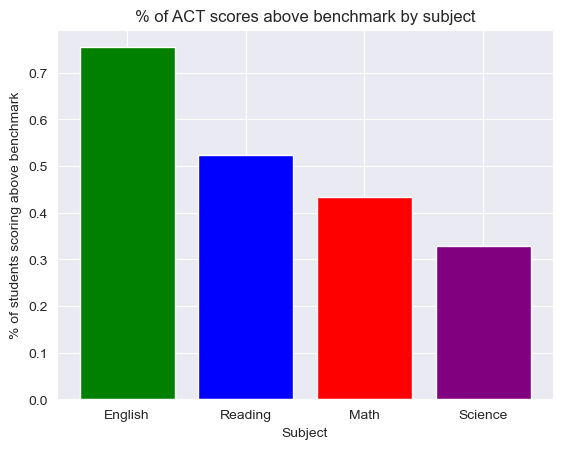

In [139]:
fig = plt.subplots(1)
# english
eng = len(final_merged_df.query('act_avg_scr_eng >= 18'))/len(final_merged_df.query('act_num_tst_takr > 1'))
plt.bar(height= eng, x = 'English', color = 'green')
#reading
read = len(final_merged_df.query('act_avg_scr_read >= 22'))/len(final_merged_df.query('act_num_tst_takr > 1'))
plt.bar(height = read, x = 'Reading', color = 'blue')
#math
math = len(final_merged_df.query('act_avg_scr_math >= 22'))/len(final_merged_df.query('act_num_tst_takr > 1'))
plt.bar(height = math, x = 'Math', color = 'red')
#science
sci = len(final_merged_df.query('act_avg_scr_sci >= 23'))/len(final_merged_df.query('act_num_tst_takr > 1'))
plt.bar(height = sci, x = 'Science', color = 'purple')
plt.title('% of ACT scores above benchmark by subject')
plt.ylabel('% of students scoring above benchmark')
plt.xlabel('Subject');

Whilst the SAT is broken into two sections: Mathematics and Exploratory Reading and Writing (E.R.W.), the ACT is subdivided into four sections, Mathematics, English, Science and Writing. These sections can generally be bucketed by S.T.E.M and non-S.T.E.M. subjects. The plot above demonstrates that readiness-benchmark results in STEM subjects significantly lag English and Reading. Within the 393 school district population, 75% met the readiness benchmarks in English, 52% met the reading benchmark, 43% met the mathematics benchmark and 33% met the science benchmark.

### Sorting School Districts by SAT Performance on Combined Math and E.R.W. Benchmarks


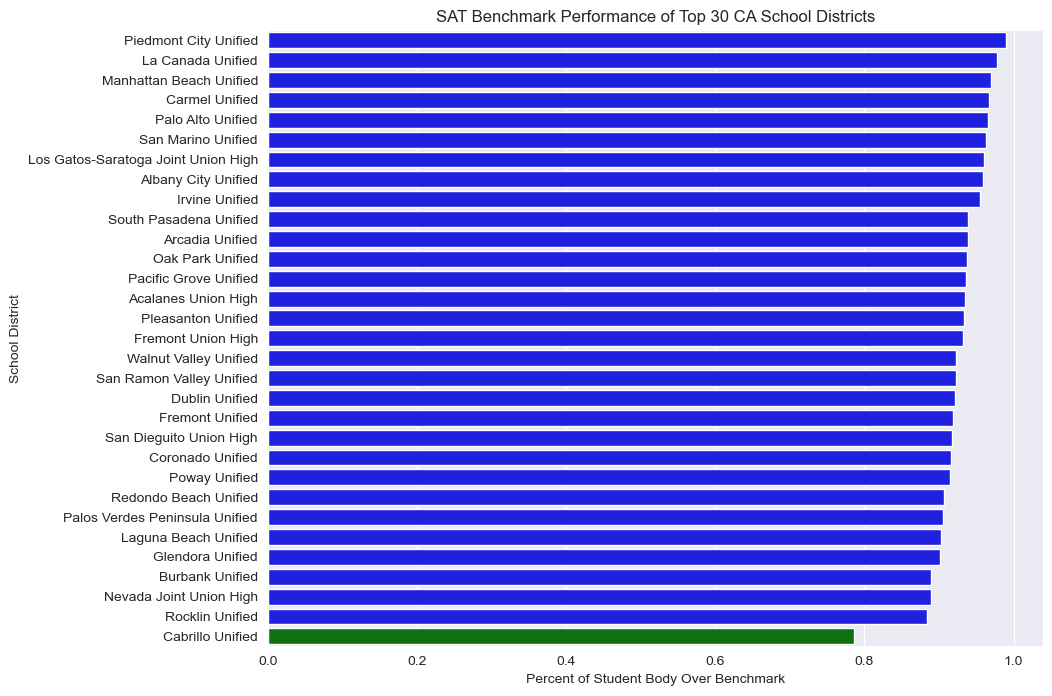

In [294]:
comparison_df_sat = pd.concat([top_thirty_sat,half_moon_bay])
# comparison_df_act = pd.concat([top_ten_act,bottom_ten_act])

plt.subplots(1, figsize=(10,8))
clrs = ['blue' if district != 'Cabrillo Unified' else 'green' for district in comparison_df_sat.d_name]
sns.barplot(comparison_df_sat, x = 'sat_pct_both_over_benchmark', y = 'd_name', palette=clrs)

plt.title('SAT Benchmark Performance of Top 30 CA School Districts')
plt.xlabel('Percent of Student Body Over Benchmark')
plt.ylabel('School District');


The difference in benchmark performance between the upper 30 CA school districts and Cabrillo Unified (in green) is illustrated above. Amongst the upper 30 districts, 93% of the student body met the college readiness-benchmarks in Mathematics and E.R.W. In the Cabrillo Unified district, 79% of SAT test takers met the readiness benchmarks across all subjects.


## Examining the percent of E.R.W. and Math SAT Scores over the benchmark


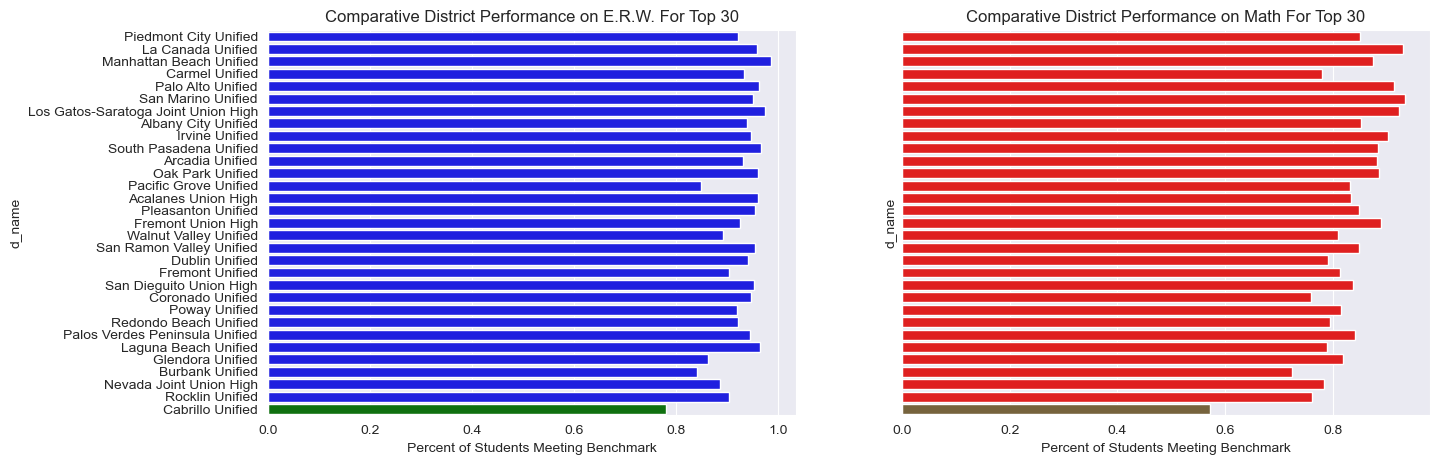

In [295]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(15, 5))
# erw plot
sns.barplot(comparison_df_sat, x = 'sat_pct_erw_over_benchmark', y = 'd_name', ax = axs[0], palette= clrs)
axs[0].set_title('Comparative District Performance on E.R.W. For Top 30')

# math plot
clrs_2 = ['red' if district != 'Cabrillo Unified' else (.5, .4, .2) for district in comparison_df_sat.d_name]
sns.barplot(comparison_df_sat, x = 'sat_pct_math_over_benchmark', y = 'd_name', ax = axs[1], palette = clrs_2)
axs[1].set_title('Comparative District Performance on Math For Top 30')
# axis labels
axs[0].set(xlabel='Percent of Students Meeting Benchmark')
axs[1].set(xlabel='Percent of Students Meeting Benchmark');


### Evidence-Based Reading and Writing
Amongst the top 30 CA School districts, over performance relative to the CollegeBoard E.R.W. benchmarks was almost uniform across the districts, with a mean value of 93% of the student body meeting the readiness benchmark, without much variance - the top district had a 99% level of performance and the lowest district had a 84% level of performance for a standard deviation of 3.6%.

Within the Cabrillo Unified District,pictured above in green, the mean level of E.R.W. benchmark performance was 78 %.

### Mathematics

Amongst the top 30 performing CA school districts, CollegeBoard mathematics benchmark performance was lower that E.R.W, with a mean value of 84 %, but still 34% higher than the mean value for the 393 school districts.

Within the Cabrillo Unified District,pictured above in green, the mean level of benchmark performance was 57 %.
### Analysis

The data suggests that California school districts generally meet SAT benchmark standards at a higher frequency in E.R.W. than in mathematics.


### Investigating Correlations to meeting benchmark scores

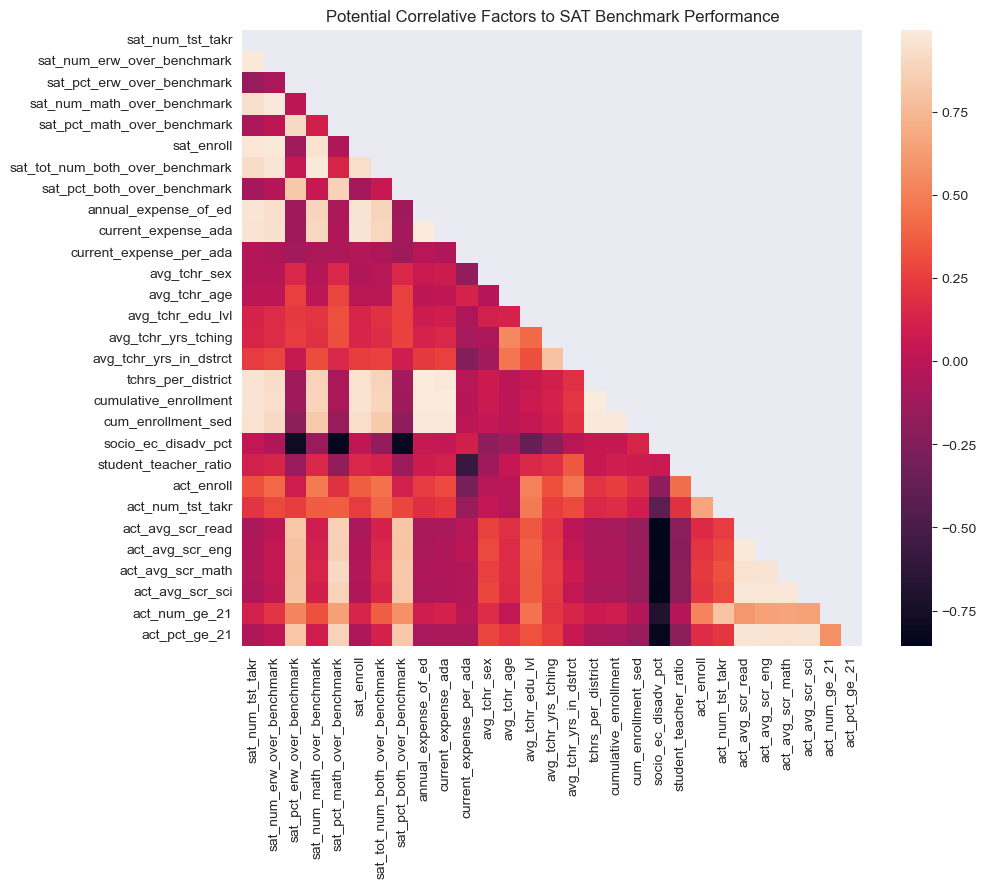

In [297]:
correlations = final_merged_df.corr()
mask = np.triu(correlations)
fig, ax = plt.subplots(figsize=(10,8))
plt.title('Potential Correlative Factors to SAT Benchmark Performance')
sns.heatmap(correlations, ax=ax, mask = mask);

The heatmap featured above can be confusing but is elucidative. Our firm was interested in strong positive and negative correlations, which show up in the heatmap as strong light and dark colored blooms.

### The Effect of Math Benchmark Performance on Overall Performance

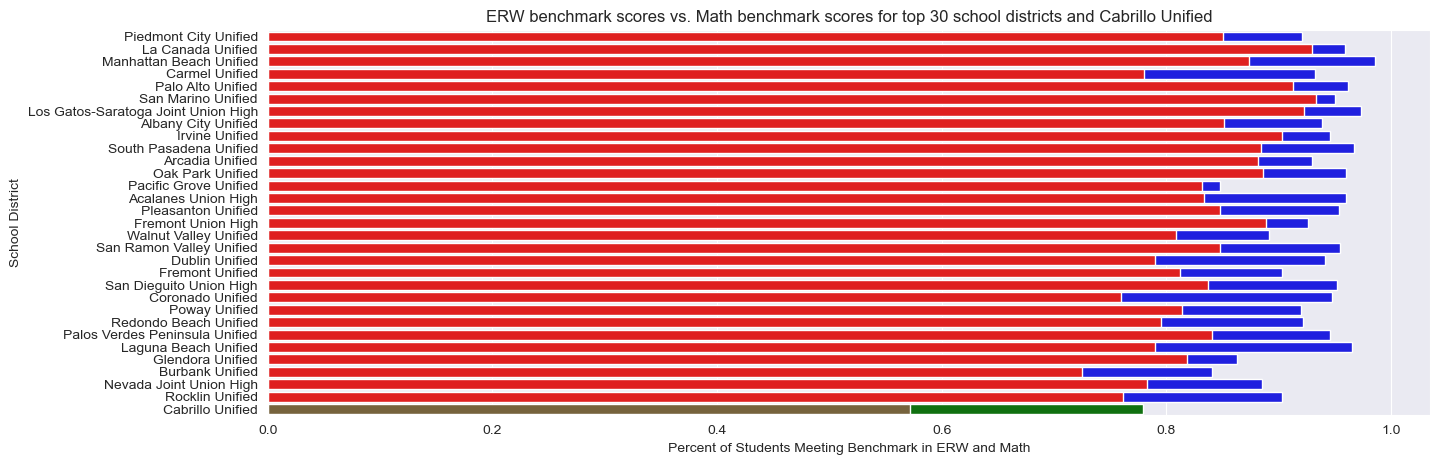

In [232]:
fig, axs = plt.subplots(1, figsize=(15,5))

# erw plot
erw = sns.barplot(comparison_df_sat, x = 'sat_pct_erw_over_benchmark', y = 'd_name', palette=clrs, label = 'E.R.W.')
# math plot
math = sns.barplot(comparison_df_sat, x = 'sat_pct_math_over_benchmark', y = 'd_name', palette=clrs_2, label = 'Math')
# set title
axs.set(title='ERW benchmark scores vs. Math benchmark scores for top 30 school districts and Cabrillo Unified')
# axis labels
axs.set(xlabel='Percent of Students Meeting Benchmark in ERW and Math', ylabel = 'School District');
# plt.legend(title = 'Math vs. ERW', labels = ['ERW', 'Math'])

The plot above depicts the gap in ERW and Mathematics scores amongst the top 30 sorted districts and the Cabrillo Unified school district. The blue bars represent the percent of students that met the ERW benchmarks and the red bars represent the percent of students that met the Math benchmarks. Thus any visible blue represents the gap in testing between ERW and STEM amongst the top school districts.

The skewed performance between mathematics and E.R.W. leads our firm to recommend a focus on mathematics and STEM subjects as a way to increase the overall level of college preparedness within Cabrillo Unified school district.

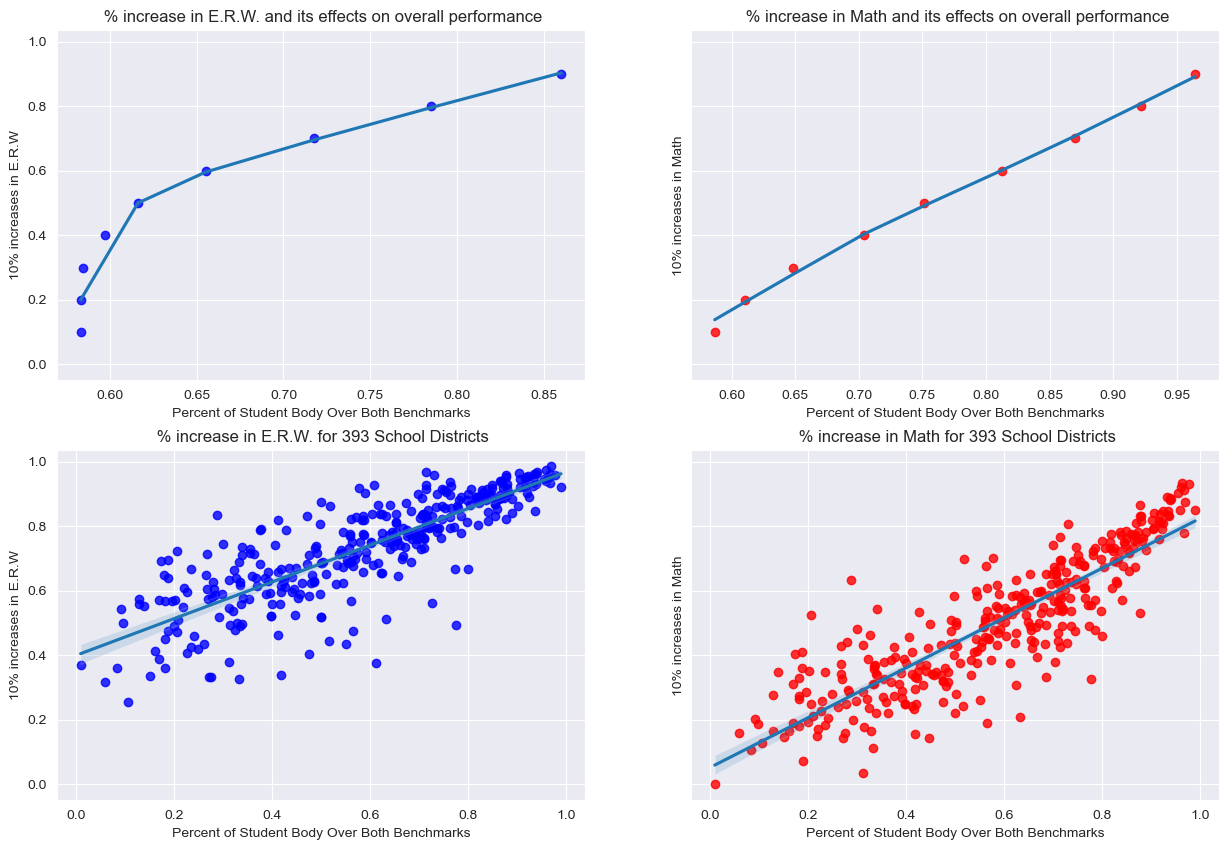

In [293]:
fig, axs = plt.subplots(2,2, sharey=True, figsize=(15,10))
axs = axs.flatten()
erw = compare_subjects('erw')
math = compare_subjects('math')
sns.regplot(erw, y = 'pct_of_students_meeting_erw_benchmark', x = 'pct_of_students_meeting_all_benchmarks',
            lowess=True, ax = axs[0], scatter_kws={"color":"blue"})
axs[0].set(title = ' % increase in E.R.W. and its effects on overall performance',ylabel = '10% increases in E.R.W',
           xlabel = 'Percent of Student Body Over Both Benchmarks')

sns.regplot(math, y = 'pct_of_students_meeting_math_benchmark', x = 'pct_of_students_meeting_all_benchmarks',
            lowess=True, ax = axs[1], scatter_kws={"color":'red'})
axs[1].set(title = ' % increase in Math and its effects on overall performance',ylabel = '10% increases in Math',
           xlabel = 'Percent of Student Body Over Both Benchmarks')

sns.regplot(y= final_merged_df.sat_pct_erw_over_benchmark, x = final_merged_df.sat_pct_both_over_benchmark, ax = axs[2], scatter_kws = {"color":"blue"})
axs[2].set(title = ' % increase in E.R.W. for 393 School Districts',ylabel = '10% increases in E.R.W',
           xlabel = 'Percent of Student Body Over Both Benchmarks')

sns.regplot(y = final_merged_df.sat_pct_math_over_benchmark, x = final_merged_df.sat_pct_both_over_benchmark, ax = axs[3], scatter_kws={'color':'red'});
axs[3].set(title = ' % increase in Math for 393 School Districts',ylabel = '10% increases in Math',
           xlabel = 'Percent of Student Body Over Both Benchmarks');

### The effect of teacher education level on SAT performance

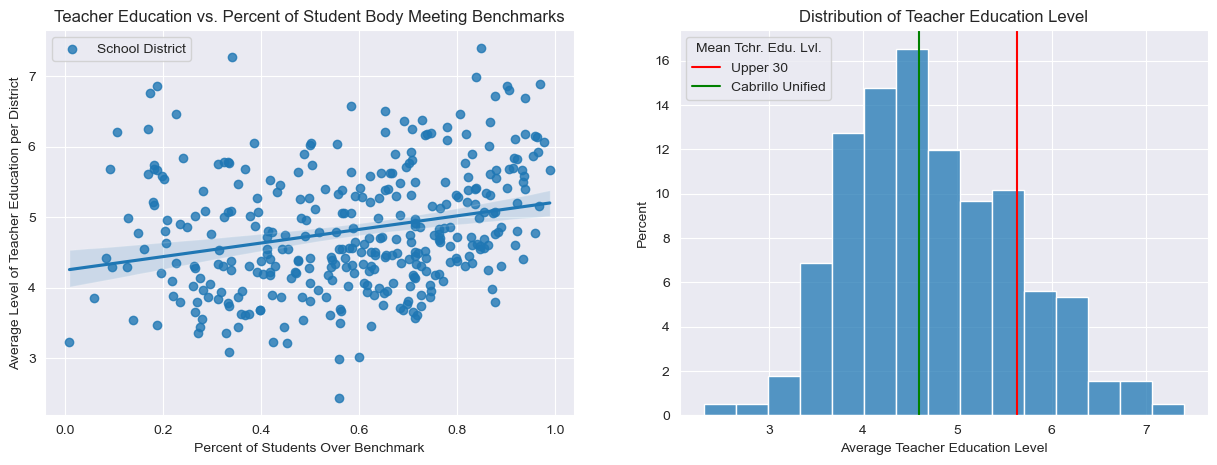

In [144]:
# Code
fig, axs = plt.subplots(1, 2, figsize=(15,5))
# regplot
sns.regplot(final_merged_df, x = 'sat_pct_both_over_benchmark', y = 'avg_tchr_edu_lvl', ax=axs[0])
axs[0].set_title('Teacher Education vs. Percent of Student Body Meeting Benchmarks')
axs[0].set(xlabel='Percent of Students Over Benchmark', ylabel = 'Average Level of Teacher Education per District')
axs[0].legend(labels=['School District'])
#histplot
sns.histplot(final_merged_df, x = 'avg_tchr_edu_lvl', ax = axs[1], stat='percent')
axs[1].set_title('Distribution of Teacher Education Level')
axs[1].set(xlabel = 'Average Teacher Education Level')
# add legend to histplot
upper_30_vline = plt.axvline(top_thirty_sat['avg_tchr_edu_lvl'].mean(), color = 'r', label='Upper 30')
cabrillo_vline = plt.axvline(half_moon_bay['avg_tchr_edu_lvl'].values, color = 'g', label = 'Cabrillo Unified');
plt.legend(title='Mean Tchr. Edu. Lvl.', loc='upper left', handles=[upper_30_vline, cabrillo_vline]);

### Discussion

The plots above indicate the effect of teacher experience on SAT benchmark outcomes amongst the 393 school districts, as well as the distribution of faculty education. The scatter plot above features all 393 school districts, and the fitted regression line indicates that an increase in faculty education correlates with an increase in SAT benchmark score.

As described in Part II, the mean rounded level of education was 6 (Fifth year within Baccalaureate) with a standard deviation of 1 amongst the top 30 school districts, with Cabrillo Unified having a mean level of faculty education of 5 (Fifth year Induction). The histogram featured to the right of the scatterplot shows the distribution of faculty education with the mean level of education for the top 30 districts plotted in red, and Cabrillo unified plotted in green.

**Reccomendation**

Faculty education is a correlative factor to SAT benchmark performance -- accordingly, we believe that the Cabrillo Unified district can potentially increase the SAT benchmark performance by instituting programs designed to increase the level of faculty education and certification.

### The effect of student teacher ratio on SAT performance

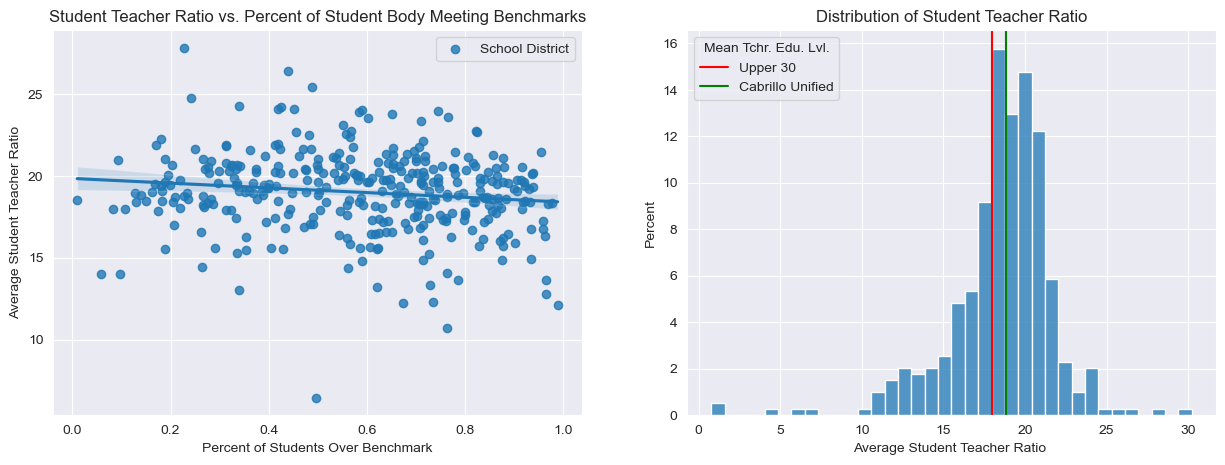

In [145]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
# regplot
sns.regplot(final_merged_df, x = 'sat_pct_both_over_benchmark', y = 'student_teacher_ratio', ax=axs[0])
axs[0].set_title('Student Teacher Ratio vs. Percent of Student Body Meeting Benchmarks')
# set x,y label
axs[0].set(xlabel='Percent of Students Over Benchmark', ylabel = 'Average Student Teacher Ratio')
# set legend
axs[0].legend(labels=['School District'])

#histplot
sns.histplot(final_merged_df, x = 'student_teacher_ratio', ax = axs[1], stat='percent')
axs[1].set_title('Distribution of Student Teacher Ratio')
axs[1].set(xlabel = 'Average Student Teacher Ratio ')
# add legend to histplot
upper_30_vline = plt.axvline(top_thirty_sat['student_teacher_ratio'].mean(), color = 'r', label='Upper 30')
cabrillo_vline = plt.axvline(half_moon_bay['student_teacher_ratio'].values, color = 'g', label = 'Cabrillo Unified');
plt.legend(title='Mean Tchr. Edu. Lvl.', loc='upper left', handles=[upper_30_vline, cabrillo_vline]);

### Discussion

The plots above indicate the effect of student-to-teacher ratio (STR) on SAT benchmark scores amongst the 393 school districts as well as the distribution of STR amongst the districts.

The scatter plot depicted above and fitted regression line indicate that a lower STR has a correlative effect with SAT benchmark performance. As outlined in Part II, the upper 30 school districts have a lower STR than the population of 393 school districts as well as Cabrillo Unified.

**Reccomendation**

STR has a slight correlative effect with SAT benchmark performance. Accordingly, we believe Cabrillo Unified should take steps to lower their student-to-teacher ratio via teacher hiring incentives for faculty. However, as outlined above, the effect of teacher education is also correlative, and more strongly, with higher SAT benchmark performance. So, given limited resources, Cabrillo Unifed may want to focus on hiring more educated teachers, rather than decreasing class size, as even slightly larger class sizes (i.e., between 18 and 20 students) have a relatively similar benchmark performance.

### The effect of teacher experience on SAT performance

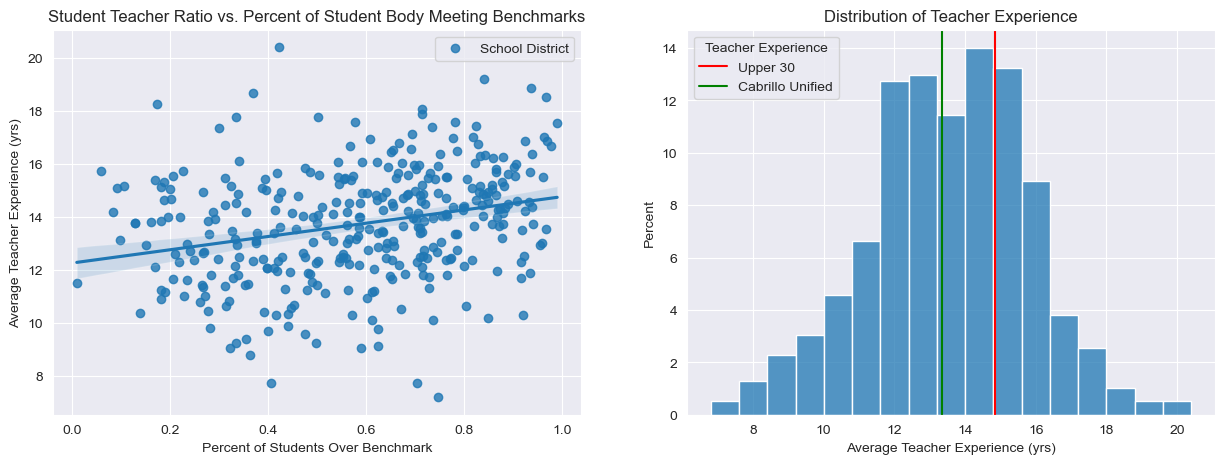

In [146]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
# regplot
sns.regplot(final_merged_df, x = 'sat_pct_both_over_benchmark', y = 'avg_tchr_yrs_tching', ax=axs[0])
axs[0].set_title('Student Teacher Ratio vs. Percent of Student Body Meeting Benchmarks')
axs[0].set(xlabel='Percent of Students Over Benchmark', ylabel = 'Average Teacher Experience (yrs)')
axs[0].legend(labels=['School District'])
#histplot
sns.histplot(final_merged_df, x = 'avg_tchr_yrs_tching', ax = axs[1], stat='percent')
axs[1].set_title('Distribution of Teacher Experience')
axs[1].set(xlabel = 'Average Teacher Experience (yrs)')
# add legend to histplot
upper_30_vline = plt.axvline(top_thirty_sat['avg_tchr_yrs_tching'].mean(), color = 'r', label='Upper 30')
cabrillo_vline = plt.axvline(half_moon_bay['avg_tchr_yrs_tching'].values, color = 'g', label = 'Cabrillo Unified');
plt.legend(title='Teacher Experience', loc='upper left', handles=[upper_30_vline, cabrillo_vline]);

### Discussion

The plots above indicate the effect of teacher experience on SAT benchmark scores amongst the 393 school districts as well as the distribution of experience amongst the districts.

The scatter plot depicted above and fitted regression line indicate that a higher level of teaching experience has a correlative effect with SAT benchmark performance. As outlined in Part II, the upper 30 school districts, on average, have more experienced teachers than the population of 393 school districts as well as Cabrillo Unified.

**Reccomendation**

Teacher experience has a positive correlation with SAT benchmark performance. Accordingly, Cabrillo Unified should consider instituting programs designed to increase the hiring and retention of more experienced faculty members.

### The effect of district funding on SAT performance


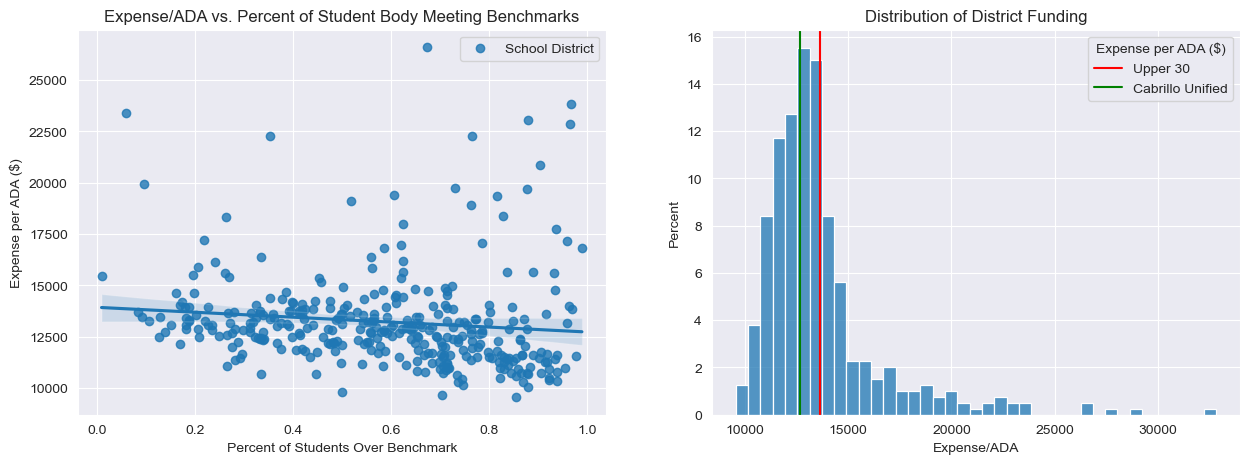

In [147]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
# regplot
sns.regplot(final_merged_df, x = 'sat_pct_both_over_benchmark', y = 'current_expense_per_ada', ax=axs[0])
axs[0].set_title('Expense/ADA vs. Percent of Student Body Meeting Benchmarks')
axs[0].set(xlabel='Percent of Students Over Benchmark', ylabel = 'Expense per ADA ($)')
axs[0].legend(labels=['School District'])
#histplot
sns.histplot(final_merged_df, x = 'current_expense_per_ada', ax = axs[1], stat='percent')
axs[1].set_title('Distribution of District Funding')
axs[1].set(xlabel = 'Expense/ADA')
# add legend to histplot
upper_30_vline = plt.axvline(top_thirty_sat['current_expense_per_ada'].mean(), color = 'r', label='Upper 30')
cabrillo_vline = plt.axvline(half_moon_bay['current_expense_per_ada'].values, color = 'g', label = 'Cabrillo Unified');
plt.legend(title='Expense per ADA ($)', loc='upper right', handles=[upper_30_vline, cabrillo_vline]);


The plots above illustrate the average cost of daily attendance (ADA) against SAT benchmark performance as well as the distribution of cost/ADA amongst the 393 school districts. The scatter plot and fitted regression line indicate that a *lower* cost per-ADA correlates with a higher level of SAT benchmark performance. This result is counter to our expected hypothesis that increased school funding would correlate with higher benchmark results (e.g., because more funding provides increased educational resources, faculty, facilities, after-school programs, etc.). Therefore we reviewed policy information to identify a potential explanation for this relationship.

**L.C.F.F and Equity**

Beginning in 2014, the new California Local Control Funding Formula (L.C.F.F.) substantially modified the existing 40 year old eduction grant dispersement regime. Within the new L.C.F.F. regime, each district will receive the same base grant for each student based on grade level. Then, the district will receive additional “supplemental” and “concentration” grants based on the numbers and concentration of high-need students (defined as low-income, English language learner, or foster youth under the law). Thus, a district that serves more high-need students will receive more funding overall than a district of the same size that serves fewer high-need students."

While the data indicates that school funding is negatively correlated to increased student benchmark achievement rates, we do not believe that reducing funding will likely result in better education outcomes. Rather, given the L.C.F.F. regime, the negative correlation can be explained by California's efforts to boost funding equity, which created a link between higher proportions of high-need students and higher funding -- as set forth in the analysis below, the data shows that socioeconomic disadvantage has a strong correlative relationship on benchmark performance.



### The effect of socioeconomic disadvantage on SAT performance

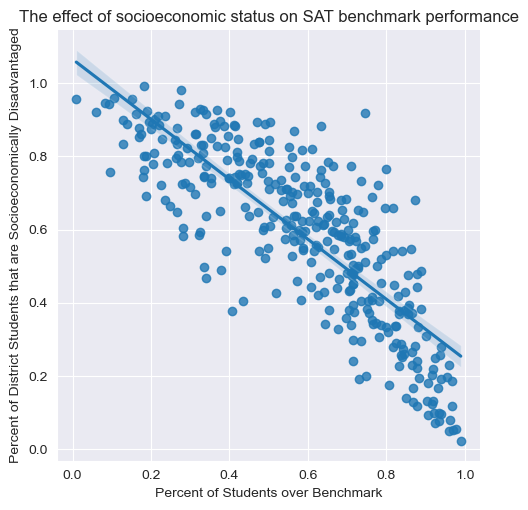

In [148]:
# px.scatter(final_merged_df, 'pct_both_over_benchmark', 'poverty_pct', trendline = 'ols')
sns.lmplot(final_merged_df, x = 'sat_pct_both_over_benchmark', y = 'socio_ec_disadv_pct');
plt.title('The effect of socioeconomic status on SAT benchmark performance')
plt.ylabel('Percent of District Students that are Socioeconomically Disadvantaged')
plt.xlabel('Percent of Students over Benchmark');

The plot above illustrates the percentage of students in each of the 393 school districts who are defined as "socio-economically disadvantaged" under California guidelines (defined as students who meet at least one of a set of criteria including: neither of the student's parents have a high school diploma, the student is eligible for free or reduced meals, the student was homeless, "migratory" or foster program eligible)  against SAT benchmark performance as well as the distribution of cost/ADA amongst the 393 school districts. The scatter plot and fitted regression line indicate that districts with a higher percentage of socio-economically disadvantaged students correlate strongly with lower levels of SAT benchmark performance.

This result indicates an area for further exploration.  While the Mayor may want to develop an initiative that can quickly boost education outcomes in the town within the existing school funding budget, more analysis may be desirable to identify whether addressing socio-economic factors would have a bigger impact on education outcomes. As explained above, there are several factors that have a positive correlation to higher education outcomes, such as teacher education, teacher experience, and class size, which may be levers that could be pulled to "move the needle" on education outcomes. But the strongest correlative relationship we identified was the negative correlation between socio-economic disadvantage and student success. Accordingly, we recommend that the Mayor authorize further study into programs that can be developed to address the underlying socio-economic disadvantages for students in the Cabrillo Unified District, which we believe may have a larger potential impact on education outcomes.

---

# Conclusions and Recommendations

### 1.  SAT vs. ACT Performance

326,823 12th graders took the SAT  and 26,593 students that took the ACT in 2018-2019. 58% sand 56%, respectively, scored above the CollegeBoard benchmark in all subjects.  After normalizing the scores, we found that the distribution of results between the two tests was effectively the same such that use of either metric could be used as a proxy for student success.  Accordingly, due the larger sample size available for SAT scores, we determined to use SAT benchmark score achievement as our proxy for student education success against which to test correlative factors.
### 2.  E.R.W. vs. STEM

The SAT/ACT benchmark results indicate a significant difference between success in english/writing versus STEM subjects. The mean percentage of all students meeting the SAT Evidence-based Reading and Writing benchmark was 73% versus 50% of all students meeting the readiness benchmark in Mathematics.  The ACT results are similar: 75% of the school districts met the readiness benchmark in English, 52% met the reading benchmark, 43% met the mathematics benchmark and 33% met the Science benchmark.

These results suggest that STEM education lags English/writing education in California.  So, the Cabrillo school board could prioritize quality STEM education. If STEM benchmark performance can be increased to match English/writing performance, this would result in a significant outcome improvement.

### 3. Teacher  Education and Experience

Amongst the top 30 school districts in California, the average faculty member is 10% more educated than a faculty member in the Cabrillo Unified School district , and has two years more experience teaching.  These results suggest that focusing on teacher quality (measured by education and experience) could improve student education outcomes.

### 4. Prioritize Programs to Lift Socioeconomically Disadvantaged Students

 The strongest correlative relationship we identified was the negative correlation between socio-economic disadvantage and student success. Accordingly, we recommend that the Mayor authorize further study into programs that can be developed to address the underlying socio-economic disadvantages for students in the Cabrillo Unified District, which we believe could result in a positive impact on education outcomes.

